<a href="https://colab.research.google.com/github/justcating/pypairs/blob/main/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Виведіть основні числові характеристики для числових ознак

In [4]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [25]:
unique_cases = df['case'].nunique()

print(unique_cases)

104
(1, 104)


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [37]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

df1 = df.copy()

for col in df1.select_dtypes(include=[np.number]).columns:
    df1 = remove_outliers(df, col)

df1.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 4
Для одного з числових стовпчиків вивести гістограму та ящик з вусами

<Axes: ylabel='Frequency'>

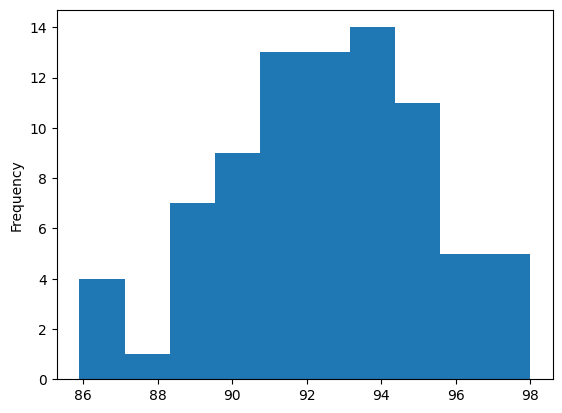

In [42]:
df['hdlngth'].plot(kind='hist')

<Axes: >

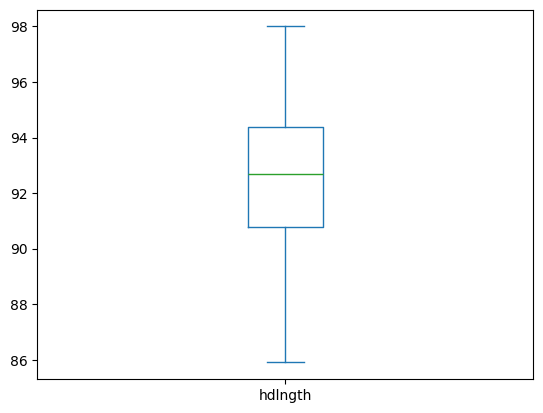

In [43]:
df['hdlngth'].plot(kind='box')

# Завдання 5
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

In [44]:
corr = df.select_dtypes(include='number').corr(method='pearson')
corr

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.972659,-0.163676,-0.338776,-0.275574,-0.468580,0.412792,-0.821968,-0.797958,-0.157037,-0.472125,-0.265540
site,0.972659,1.000000,-0.108833,-0.324327,-0.236290,-0.433366,0.443614,-0.832566,-0.821061,-0.130781,-0.419412,-0.243232
age,-0.163676,-0.108833,1.000000,0.458405,0.518838,0.284461,0.048069,0.101946,0.040225,0.182907,0.361556,0.384867
hdlngth,-0.338776,-0.324327,0.458405,1.000000,0.695922,0.538826,0.020629,0.405676,0.308280,0.343917,0.552486,0.440688
skullw,-0.275574,-0.236290,0.518838,0.695922,1.000000,0.509095,0.152847,0.340076,0.166379,0.405472,0.562353,0.467515
totlngth,-0.468580,-0.433366,0.284461,0.538826,0.509095,1.000000,0.382680,0.464180,0.299545,0.183438,0.490806,0.341900
taill,0.412792,0.443614,0.048069,0.020629,0.152847,0.382680,1.000000,-0.339331,-0.473938,0.024132,-0.032987,0.097152
footlgth,-0.821968,-0.832566,0.101946,0.405676,0.340076,0.464180,-0.339331,1.000000,0.855161,0.041812,0.432600,0.265210
earconch,-0.797958,-0.821061,0.040225,0.308280,0.166379,0.299545,-0.473938,0.855161,1.000000,-0.066963,0.322935,0.132074
eye,-0.157037,-0.130781,0.182907,0.343917,0.405472,0.183438,0.024132,0.041812,-0.066963,1.000000,0.186882,0.242459


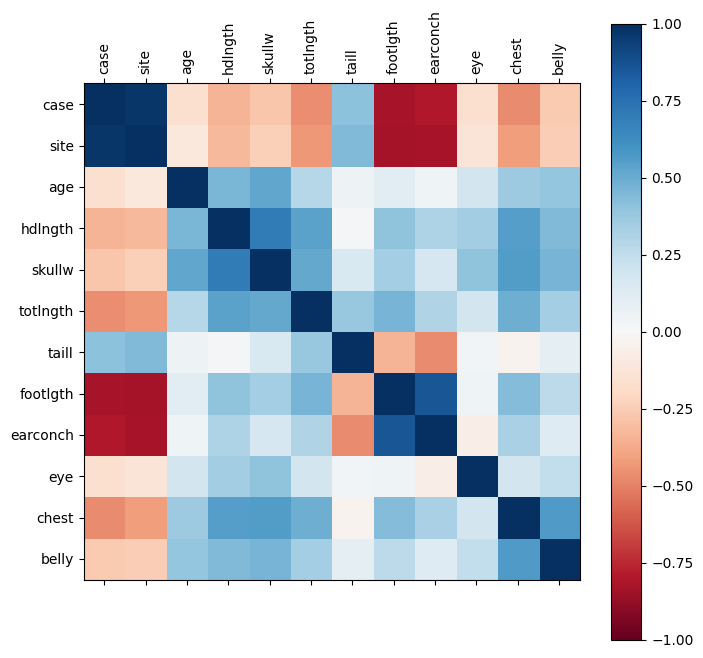

In [45]:
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu', fignum=False)

# підписи для рядків та стовпчиків матриці
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

# Завдання 6
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

<ipython-input-48-0fdd9391dd08>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_data, female_data], labels=['Male', 'Female'])
<ipython-input-48-0fdd9391dd08>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_data, female_data], labels=['Male', 'Female'])
<ipython-input-48-0fdd9391dd08>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_data, female_data], labels=['Male', 'Female'])
<ipython-input-48-0fdd9391dd08>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be 

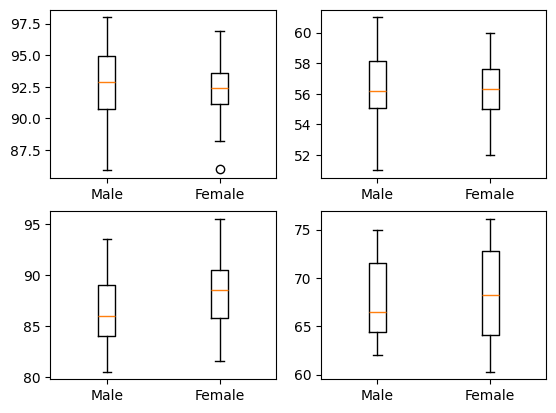

In [48]:
features = ['hdlngth', 'skullw', 'totlngth', 'footlgth']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    male_data = df[df['sex'] == 'm'][feature]
    female_data = df[df['sex'] == 'f'][feature]
    plt.boxplot([male_data, female_data], labels=['Male', 'Female'])
plt.show()